In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.2     √ dplyr   0.7.5
√ tidyr   0.8.1     √ stringr 1.3.0
√ readr   1.1.1     √ forcats 0.3.0
Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
shannon <- "07.Diversity/arare_max3000//alpha_div_collated/shannon.tsv"
sh.df <- read_tsv(shannon)
head(sh.df)

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


SRS024511,SRS052433,SRS064276,SRS055482,SRS021910,SRS015578,SRS063324,SRS015247,SRS062464,SRS052697,...,SRS047561,normal47,SRS017394,SRS024568,SRS016267,SRS016437,SRS013216,normal86,SRS023914,normal96
7.829495,5.162691,7.641128,7.412441,7.989978,7.459786,5.757802,6.850173,7.931501,8.241329,...,6.803807,3.811434,6.965053,6.341949,6.890252,6.659744,5.690504,4.571939,6.911304,5.686784
7.711558,5.132068,7.659751,7.328706,7.863332,7.375920,5.856156,6.959987,7.966801,8.266709,...,6.859206,3.778073,6.996679,6.290641,6.829701,6.672768,5.697864,4.549528,6.923613,5.682353
7.805917,5.157931,7.739236,7.325335,7.871295,7.310026,5.870101,6.939067,7.956859,8.251073,...,6.874596,3.941642,6.953442,6.320502,6.872187,6.680857,5.773274,4.605008,6.938409,5.655999
7.813254,5.168263,7.607753,7.373732,7.904795,7.435647,5.828646,6.901958,8.011869,8.354789,...,6.866249,3.891702,7.029865,6.305363,6.856721,6.657110,5.699411,4.527008,6.955051,5.665813
7.790877,5.147589,7.640816,7.327231,7.857423,7.333099,5.843590,6.969316,8.000886,8.275634,...,6.829026,3.890309,7.060807,6.297968,6.849620,6.692234,5.633336,4.554628,6.938749,5.617618
7.792253,5.147154,7.672550,7.413791,7.853191,7.438524,5.885481,6.955842,7.911026,8.227226,...,6.878292,3.804239,6.998401,6.305646,6.866771,6.665450,5.694332,4.519482,6.931932,5.739530


In [3]:
sh.df.long <- sh.df %>% gather(Sample, value)
head(sh.df.long)

Sample,value
SRS024511,7.829495
SRS024511,7.711558
SRS024511,7.805917
SRS024511,7.813254
SRS024511,7.790877
SRS024511,7.792253


In [4]:
sh.df.long$Description <- ifelse(startsWith(sh.df.long$Sample, "SR"), "HMPHSs", "KAHSs")
head(sh.df.long)

Sample,value,Description
SRS024511,7.829495,HMPHSs
SRS024511,7.711558,HMPHSs
SRS024511,7.805917,HMPHSs
SRS024511,7.813254,HMPHSs
SRS024511,7.790877,HMPHSs
SRS024511,7.792253,HMPHSs


In [5]:
pdtree <- "07.Diversity/arare_max3000//alpha_div_collated/PD_whole_tree.tsv"
pd.df <- read_tsv(pdtree)
head(pd.df)

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


SRS024511,SRS052433,SRS064276,SRS055482,SRS021910,SRS015578,SRS063324,SRS015247,SRS062464,SRS052697,...,SRS047561,normal47,SRS017394,SRS024568,SRS016267,SRS016437,SRS013216,normal86,SRS023914,normal96
24.33746,20.86242,24.37058,22.37561,28.21669,21.72889,17.92279,23.60984,24.69815,29.41655,...,16.40978,5.82771,16.82301,12.81734,17.63173,11.61468,10.91119,12.48450,21.15380,9.71811
22.93748,20.55998,23.61100,20.57843,27.60693,21.53065,19.11548,22.65191,24.44629,28.86649,...,17.72533,5.73187,16.65003,13.46830,17.54959,10.75672,11.37980,12.26187,20.59556,9.96433
23.24513,20.86415,25.08825,22.88980,27.63913,20.83064,18.59157,22.36154,24.11982,28.12233,...,17.07145,5.77533,16.14503,13.92168,16.04409,11.80287,11.43742,13.15908,20.53921,10.26189
24.05774,20.85350,23.77126,21.72602,27.80063,22.02833,19.02211,22.89578,24.10881,30.02067,...,17.67285,6.03889,16.83814,13.31229,16.89503,11.46790,10.50652,12.72785,20.48014,10.59383
22.84086,20.84531,23.63246,22.03945,27.49895,22.08103,18.66629,22.52591,23.55218,28.30090,...,17.79053,5.58112,16.99271,13.49859,16.49279,11.09942,11.29794,12.40887,20.61961,9.96848
23.55775,20.83067,25.30950,22.18741,27.61207,22.41942,19.39422,22.32969,23.99298,28.82250,...,17.77758,6.08485,15.64886,13.53244,15.90613,11.51145,10.47710,12.42916,21.08396,10.39060


In [6]:
pd.df.long <- pd.df %>% gather(Sample, value)
head(pd.df.long)

Sample,value
SRS024511,24.33746
SRS024511,22.93748
SRS024511,23.24513
SRS024511,24.05774
SRS024511,22.84086
SRS024511,23.55775


In [7]:
pd.df.long$Description <- ifelse(startsWith(pd.df.long$Sample, "SR"), "HMPHSs", "KAHSs")
head(pd.df.long)

Sample,value,Description
SRS024511,24.33746,HMPHSs
SRS024511,22.93748,HMPHSs
SRS024511,23.24513,HMPHSs
SRS024511,24.05774,HMPHSs
SRS024511,22.84086,HMPHSs
SRS024511,23.55775,HMPHSs


In [8]:
pd.df.long$index <- "PD_whole_tree"

head(pd.df.long)

Sample,value,Description,index
SRS024511,24.33746,HMPHSs,PD_whole_tree
SRS024511,22.93748,HMPHSs,PD_whole_tree
SRS024511,23.24513,HMPHSs,PD_whole_tree
SRS024511,24.05774,HMPHSs,PD_whole_tree
SRS024511,22.84086,HMPHSs,PD_whole_tree
SRS024511,23.55775,HMPHSs,PD_whole_tree


In [9]:
sh.df.long$index <- "Shannon Index"
head(sh.df.long)

Sample,value,Description,index
SRS024511,7.829495,HMPHSs,Shannon Index
SRS024511,7.711558,HMPHSs,Shannon Index
SRS024511,7.805917,HMPHSs,Shannon Index
SRS024511,7.813254,HMPHSs,Shannon Index
SRS024511,7.790877,HMPHSs,Shannon Index
SRS024511,7.792253,HMPHSs,Shannon Index


In [10]:
final.df <- rbind(pd.df.long, sh.df.long)
head(final.df)

Sample,value,Description,index
SRS024511,24.33746,HMPHSs,PD_whole_tree
SRS024511,22.93748,HMPHSs,PD_whole_tree
SRS024511,23.24513,HMPHSs,PD_whole_tree
SRS024511,24.05774,HMPHSs,PD_whole_tree
SRS024511,22.84086,HMPHSs,PD_whole_tree
SRS024511,23.55775,HMPHSs,PD_whole_tree


In [11]:
simpson <- "07.Diversity/arare_max3000//alpha_div_collated/inverse-simpson.tsv"

sim.df <- read_tsv(simpson)
head(sim.df)

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


SRS024511,SRS052433,SRS064276,SRS055482,SRS021910,SRS015578,SRS063324,SRS015247,SRS062464,SRS052697,...,SRS047561,normal47,SRS017394,SRS024568,SRS016267,SRS016437,SRS013216,normal86,SRS023914,normal96
0.9855033,0.7891216,0.9865764,0.9826844,0.9866984,0.9776280,0.9373193,0.9643027,0.9900724,0.9919991,...,0.9731333,0.7966162,0.9812091,0.9666160,0.9793549,0.9799889,0.9352760,0.7795082,0.9801993,0.9621036
0.9843187,0.7869618,0.9867844,0.9802747,0.9860700,0.9763927,0.9409400,0.9640622,0.9897411,0.9920169,...,0.9741209,0.7926402,0.9816740,0.9652489,0.9781627,0.9800660,0.9353122,0.7823709,0.9804898,0.9621240
0.9855549,0.7890984,0.9874927,0.9794069,0.9860662,0.9760280,0.9410220,0.9648164,0.9898391,0.9920038,...,0.9745178,0.8120662,0.9815038,0.9658758,0.9796029,0.9796278,0.9387616,0.7829144,0.9798842,0.9613827
0.9853220,0.7903133,0.9863098,0.9818387,0.9863033,0.9772724,0.9405251,0.9630113,0.9902447,0.9927776,...,0.9738787,0.8093773,0.9819947,0.9649178,0.9791709,0.9796993,0.9365673,0.7808989,0.9805498,0.9609922
0.9855702,0.7884784,0.9869076,0.9810613,0.9857562,0.9744162,0.9383924,0.9653151,0.9901589,0.9918076,...,0.9741982,0.8022880,0.9820933,0.9652853,0.9789604,0.9805178,0.9347860,0.7823727,0.9800718,0.9618504
0.9858484,0.7876231,0.9873884,0.9813864,0.9861016,0.9769236,0.9408140,0.9648758,0.9897844,0.9917093,...,0.9748493,0.7929104,0.9821038,0.9652087,0.9797171,0.9798687,0.9379478,0.7794422,0.9804944,0.9623998


In [12]:
sim.df.long <- sim.df %>% gather(Sample, value)
sim.df.long$Description <- ifelse(startsWith(sim.df.long$Sample, "SR"), "HMPHSs", "KAHSs")
sim.df.long$index <- "Inverse Simpson"
head(sim.df.long)

Sample,value,Description,index
SRS024511,0.9855033,HMPHSs,Inverse Simpson
SRS024511,0.9843187,HMPHSs,Inverse Simpson
SRS024511,0.9855549,HMPHSs,Inverse Simpson
SRS024511,0.9853220,HMPHSs,Inverse Simpson
SRS024511,0.9855702,HMPHSs,Inverse Simpson
SRS024511,0.9858484,HMPHSs,Inverse Simpson


In [13]:
final.df <- rbind(pd.df.long, sh.df.long)
final.df <- rbind(final.df, sim.df.long)
dim(final.df)

[1] 10650     4

In [15]:
library(RColorBrewer)
brewer.pal(12,"Set3")

[1] "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69"
 [8] "#FCCDE5" "#D9D9D9" "#BC80BD" "#CCEBC5" "#FFED6F"

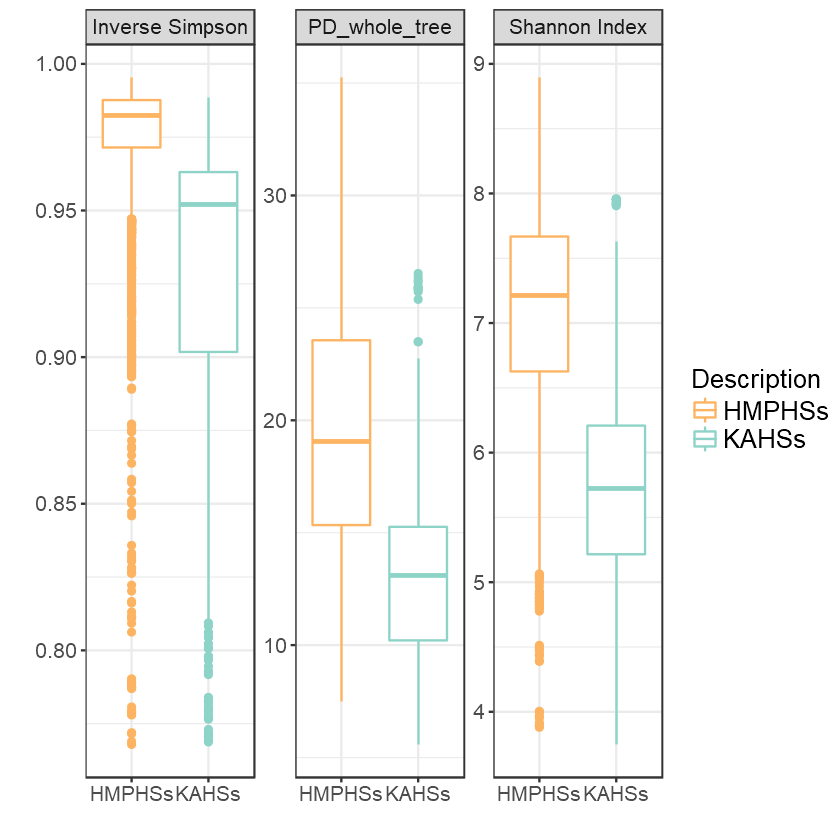

In [18]:
ggplot(final.df) + geom_boxplot(aes(x=Description, y=value, color=Description)) + theme_bw() + theme(plot.title = element_text(hjust = 0.5)) + 
  xlab("") + ylab("") + facet_wrap(~index, scale="free") + 
theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) +
theme(text=element_text(size=15)) + scale_fill_brewer(palette="Set3") +
labs(fill="Sample") + theme(legend.text=element_text(size=15)) + scale_color_manual(values = c('#FDB462', "#8DD3C7"))

ggsave(paste0("alpha",'.png'), width=20, height=10, units="cm")

In [15]:
head(final.df)

Sample,value,Description,index
SRS024511,24.33746,HMP,PD_whole_tree
SRS024511,22.93748,HMP,PD_whole_tree
SRS024511,23.24513,HMP,PD_whole_tree
SRS024511,24.05774,HMP,PD_whole_tree
SRS024511,22.84086,HMP,PD_whole_tree
SRS024511,23.55775,HMP,PD_whole_tree


In [17]:
write.csv(final.df, "alpha.csv", row.names=FALSE)

In [23]:
final.df %>% group_by(index, Description) %>% summarise(index.value = mean(value))

index,Description,index.value
Inverse Simpson,HMP,0.9735367
Inverse Simpson,Korean,0.9272782
PD_whole_tree,HMP,19.3845874
PD_whole_tree,Korean,13.3146114
Shannon Index,HMP,7.0911621
Shannon Index,Korean,5.7141477


In [24]:
alpha.df <- final.df %>% group_by(index, Description) %>% summarise(index.value = mean(value))
write.csv(alpha.df, "alpha.values.csv", row.names=FALSE)

In [28]:
#ph_whole_tree wilcoxon rank test
wilcox.test(pd.df.long %>% filter(Description=="Korean") %>% select(value) %>% unlist, pd.df.long %>% filter(Description=="HMP") %>% select(value) %>% unlist)


	Wilcoxon rank sum test with continuity correction

data:  pd.df.long %>% filter(Description == "Korean") %>% select(value) %>%  and pd.df.long %>% filter(Description == "HMP") %>% select(value) %>%     unlist and     unlist
W = 198220, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [29]:
#simspon wilcoxon rank test
wilcox.test(sim.df.long %>% filter(Description=="Korean") %>% select(value) %>% unlist, sim.df.long %>% filter(Description=="HMP") %>% select(value) %>% unlist)


	Wilcoxon rank sum test with continuity correction

data:  sim.df.long %>% filter(Description == "Korean") %>% select(value) %>%  and sim.df.long %>% filter(Description == "HMP") %>% select(value) %>%     unlist and     unlist
W = 175030, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [30]:
# shannon wilcoxon test
wilcox.test(sh.df.long %>% filter(Description=="Korean") %>% select(value) %>% unlist, sh.df.long %>% filter(Description=="HMP") %>% select(value) %>% unlist)


	Wilcoxon rank sum test with continuity correction

data:  sh.df.long %>% filter(Description == "Korean") %>% select(value) %>%  and sh.df.long %>% filter(Description == "HMP") %>% select(value) %>%     unlist and     unlist
W = 144010, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
